<a href="https://colab.research.google.com/github/NeerajaSuresh888/Market-Segmentation-Analysis/blob/main/Market_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rpy2

# STEP 6 : Profiling Segments

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Step 1: Prepare Data ----
# Assuming df is your DataFrame and these are the perception variables
attributes = ["disgusting", "expensive", "greasy", "healthy",
              "spicy", "fast", "convenient", "fattening",
              "cheap", "tasty", "yummy"]

MD_x = df[attributes]
MD_x_scaled = (MD_x - MD_x.mean()) / MD_x.std()



In [ ]:
# ---- Step 2: Run KMeans clustering ----
kmeans = KMeans(n_clusters=4, random_state=123)
df['segment'] = kmeans.fit_predict(MD_x_scaled)


In [ ]:

# ---- Step 3: Hierarchical clustering on attributes ----
dist_matrix = pdist(MD_x_scaled.T, metric='euclidean')
linkage_matrix = linkage(dist_matrix, method='ward')

# Get attribute order from dendrogram
dendro = dendrogram(linkage_matrix, no_plot=True)
ordered_attributes = [attributes[i] for i in dendro['leaves']]



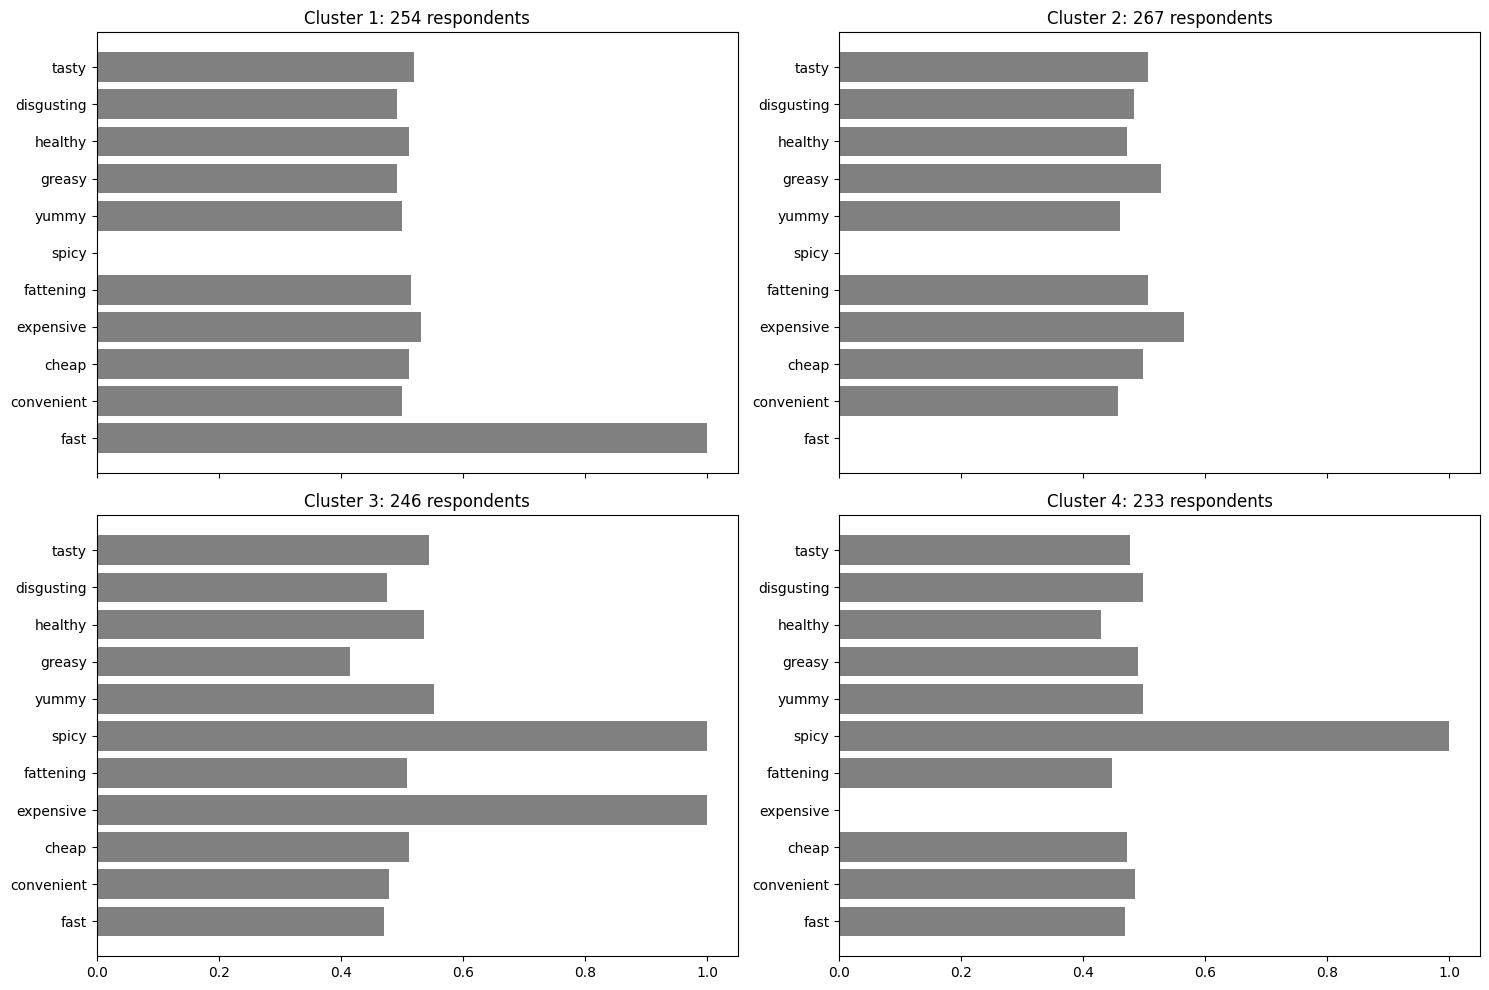

In [ ]:
# ---- Step 4: Segment Profile Plot ----
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
segment_labels = ['Segment 0', 'Segment 1', 'Segment 2', 'Segment 3']
segment_sizes = df['segment'].value_counts().sort_index()

for i, ax in enumerate(axes.flat):
    segment_data = df[df['segment'] == i][attributes]
    segment_means = segment_data.mean()[ordered_attributes]

    # Plot horizontal bars
    ax.barh(range(len(ordered_attributes)), segment_means, color='gray')
    ax.set_yticks(range(len(ordered_attributes)))
    ax.set_yticklabels(ordered_attributes)
    ax.set_title(f'Cluster {i+1}: {segment_sizes[i]} respondents')

plt.tight_layout()
plt.show()


In [ ]:

# ---- Step 5: PCA for separation plot ----
pca = PCA(n_components=2)
pca_components = pca.fit_transform(MD_x_scaled)

df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]


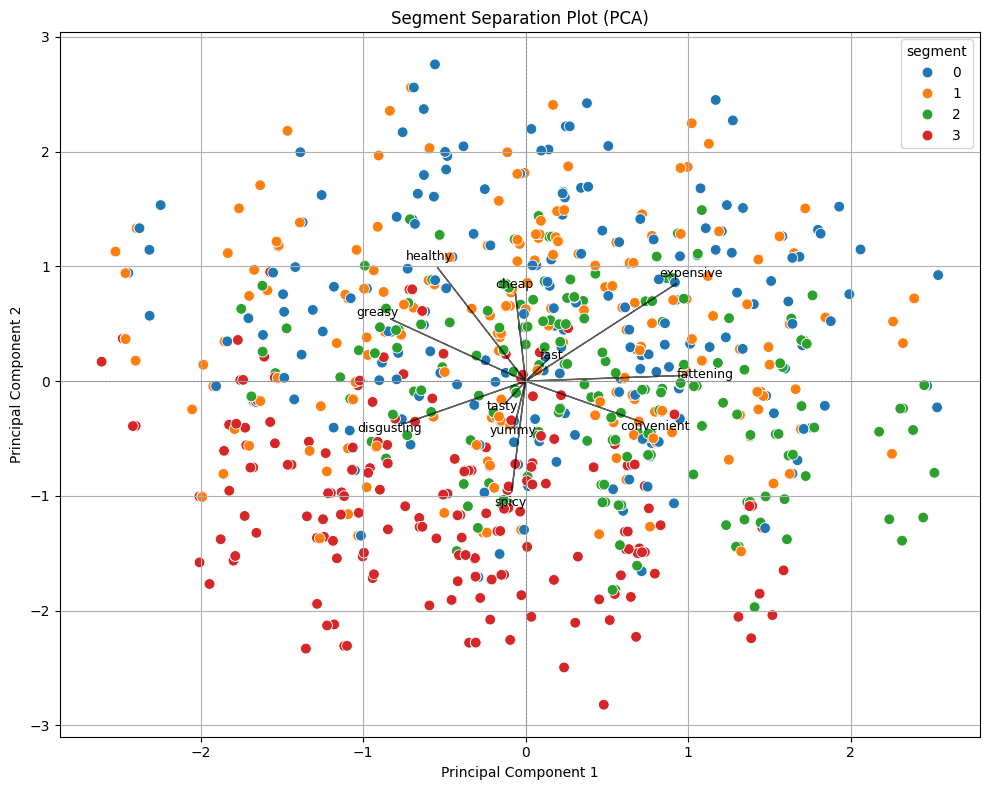

In [ ]:

# ---- Step 6: Segment Separation Plot ----
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='segment', palette='tab10', s=60)
plt.title('Segment Separation Plot (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

# Optional: Show variable axes like projAxes
loadings = pca.components_.T
for i, attr in enumerate(attributes):
    plt.arrow(0, 0, loadings[i, 0]*2, loadings[i, 1]*2, color='black', alpha=0.6)
    plt.text(loadings[i, 0]*2.2, loadings[i, 1]*2.2, attr, ha='center', va='center', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 8: Selecting (the) Target Segment(s)

Data loaded successfully. Shape: (1453, 15)

After conversion:
VisitFreqNumeric - Non-null count: 1453
VisitFreqNumeric range: 0 to 6
LikeNumeric - Non-null count: 1453
LikeNumeric range: -5 to 5

Rows after dropping missing values: 1453 (dropped 0)

Summary data for plotting:
   Segment     Visit      Like    Female
0        1  3.147887  2.508803  0.614437
1        2  1.566964 -2.154018  0.524554
2        3  2.580882  0.683824  0.463235
3        4  3.026578  1.913621  0.468439


<ipython-input-1-4d6969a0e53b>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[perception_columns] = df[perception_columns].replace({'Yes': 1, 'No': 0})


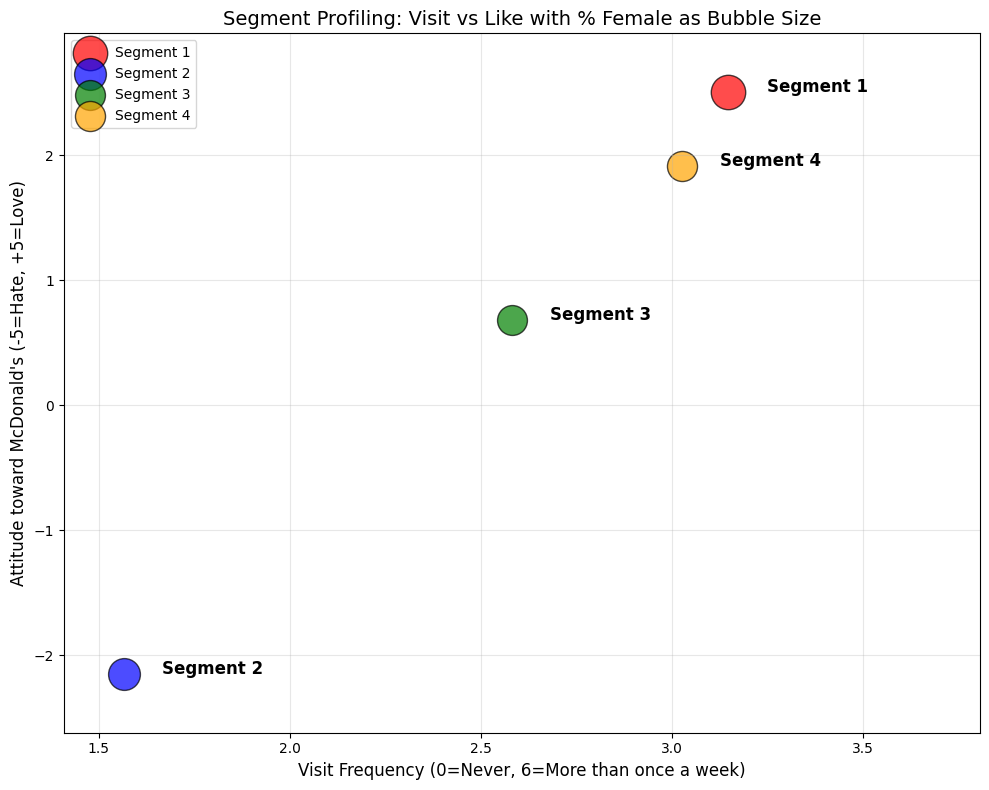


Segment Characteristics:

Segment 1:
  Average Visit Frequency: 3.1
  Average Like Score: 2.5
  Percentage Female: 61.4%
  Profile: Monthly, Like/Love

Segment 2:
  Average Visit Frequency: 1.6
  Average Like Score: -2.2
  Percentage Female: 52.5%
  Profile: Once a year, Strongly dislike

Segment 3:
  Average Visit Frequency: 2.6
  Average Like Score: 0.7
  Percentage Female: 46.3%
  Profile: Few times a year, Neutral/Slightly positive

Segment 4:
  Average Visit Frequency: 3.0
  Average Like Score: 1.9
  Percentage Female: 46.8%
  Profile: Monthly, Neutral/Slightly positive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Load data
df = pd.read_csv('/content/mcdonalds.csv')
print(f"Data loaded successfully. Shape: {df.shape}")

# Define perception columns
perception_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                      'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Convert Yes/No to 1/0
df[perception_columns] = df[perception_columns].replace({'Yes': 1, 'No': 0})

# Cluster
X_scaled = StandardScaler().fit_transform(df[perception_columns])
kmeans = KMeans(n_clusters=4, random_state=1)
df['Segment'] = kmeans.fit_predict(X_scaled) + 1

# FIXED: Map VisitFrequency to numeric with correct values
visit_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,  # Added this
    'Once a month': 3,
    'Once a week': 5,
    'More than once a week': 6  # Added this
}
df['VisitFreqNumeric'] = df['VisitFrequency'].map(visit_mapping)

# FIXED: Handle Like column - it's already numeric but as strings
# Convert string numbers to actual numbers
def convert_like(value):
    if pd.isna(value):
        return np.nan

    # Handle string values that are already numeric
    if isinstance(value, str):
        # Remove any non-numeric characters and convert
        if value.startswith('+'):
            return int(value[1:])
        elif value.startswith('-'):
            return int(value)
        elif 'love' in value.lower():
            return 5
        elif 'hate' in value.lower():
            return -5
        else:
            try:
                return int(value)
            except:
                return 0
    else:
        return value

df['LikeNumeric'] = df['Like'].apply(convert_like)

# Check the conversion worked
print(f"\nAfter conversion:")
print(f"VisitFreqNumeric - Non-null count: {df['VisitFreqNumeric'].notna().sum()}")
print(f"VisitFreqNumeric range: {df['VisitFreqNumeric'].min()} to {df['VisitFreqNumeric'].max()}")
print(f"LikeNumeric - Non-null count: {df['LikeNumeric'].notna().sum()}")
print(f"LikeNumeric range: {df['LikeNumeric'].min()} to {df['LikeNumeric'].max()}")

# Drop rows with missing Like or VisitFreq
initial_count = len(df)
df = df.dropna(subset=['LikeNumeric', 'VisitFreqNumeric'])
final_count = len(df)
print(f"\nRows after dropping missing values: {final_count} (dropped {initial_count - final_count})")

# Create summary for plotting
df_clean = df[['Segment', 'VisitFreqNumeric', 'LikeNumeric', 'Gender']].dropna()
df_clean['Segment'] = df_clean['Segment'].astype(int)

summary = df_clean.groupby('Segment').agg({
    'VisitFreqNumeric': 'mean',
    'LikeNumeric': 'mean',
    'Gender': lambda x: (x == 'Female').mean()
}).rename(columns={
    'VisitFreqNumeric': 'Visit',
    'LikeNumeric': 'Like',
    'Gender': 'Female'
}).reset_index()

print(f"\nSummary data for plotting:")
print(summary)

# Plot
plt.figure(figsize=(10, 8))

# Create scatter plot
colors = ['red', 'blue', 'green', 'orange']
for i, row in summary.iterrows():
    plt.scatter(row['Visit'], row['Like'],
               s=1000 * row['Female'],
               alpha=0.7,
               edgecolors='black',
               color=colors[i % len(colors)],
               label=f"Segment {int(row['Segment'])}")

# Add labels for each point
for i, row in summary.iterrows():
    plt.text(row['Visit'] + 0.1, row['Like'],
             f"Segment {int(row['Segment'])}",
             fontsize=12,
             fontweight='bold')

plt.xlabel('Visit Frequency (0=Never, 6=More than once a week)', fontsize=12)
plt.ylabel("Attitude toward McDonald's (-5=Hate, +5=Love)", fontsize=12)
plt.title('Segment Profiling: Visit vs Like with % Female as Bubble Size', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

# Add some padding to the plot
x_margin = (summary['Visit'].max() - summary['Visit'].min()) * 0.1
y_margin = (summary['Like'].max() - summary['Like'].min()) * 0.1
plt.xlim(summary['Visit'].min() - x_margin, summary['Visit'].max() + x_margin + 0.5)
plt.ylim(summary['Like'].min() - y_margin, summary['Like'].max() + y_margin)

plt.tight_layout()
plt.show()

# Print segment characteristics
print(f"\nSegment Characteristics:")
for i, row in summary.iterrows():
    segment = int(row['Segment'])
    visit_freq = row['Visit']
    like_score = row['Like']
    female_pct = row['Female'] * 100

    print(f"\nSegment {segment}:")
    print(f"  Average Visit Frequency: {visit_freq:.1f}")
    print(f"  Average Like Score: {like_score:.1f}")
    print(f"  Percentage Female: {female_pct:.1f}%")

    # Interpret visit frequency
    if visit_freq < 1:
        visit_desc = "Rarely/Never"
    elif visit_freq < 2:
        visit_desc = "Once a year"
    elif visit_freq < 3:
        visit_desc = "Few times a year"
    elif visit_freq < 4:
        visit_desc = "Monthly"
    elif visit_freq < 6:
        visit_desc = "Weekly"
    else:
        visit_desc = "Multiple times per week"

    # Interpret like score
    if like_score < -2:
        like_desc = "Strongly dislike"
    elif like_score < 0:
        like_desc = "Dislike"
    elif like_score < 2:
        like_desc = "Neutral/Slightly positive"
    else:
        like_desc = "Like/Love"

    print(f"  Profile: {visit_desc}, {like_desc}")


# **STEP 9: Customising the Marketing Mix**
Filter the target segment from your clustered data, analyze their preferences, and use Markdown cells to propose tailored 4Ps (Product, Price, Promotion, Place) based on those insights.